Goal: visualize the impact of trees and depth on out of sample scores
Understand Out of Bag errors:
https://datascience.stackexchange.com/questions/13151/randomforestclassifier-oob-scoring-method

In [1]:
# Utilities
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
import pickle

# Sklearn
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn import metrics

from sklearn.datasets import make_classification


X, y = make_classification(n_features=30, 
                           random_state=0, n_classes=2, n_samples=4000, 
                           weights=[7/8, 1/8],
                           n_informative=20)

In [2]:
# Source: https://stackoverflow.com/questions/61965700/adjust-threshold-cros-val-score-sklearn
class MyRF(RandomForestClassifier):
    def fit(self, X, y, **kwargs):
        RandomForestClassifier.fit(self, X=X, y=y, **kwargs)
        y_proba = RandomForestClassifier.predict_proba(self, X=X)[:, 1]
        precision, recall, thresholds = metrics.precision_recall_curve(y, y_proba)
        f1 = 2 * np.multiply(precision, recall) / (precision + recall)
        self.threshold = thresholds[np.argmax(f1)]
        self.train_f1 = np.max(f1)
        return self
        
    def predict(self,X, **kwargs):
        result = RandomForestClassifier.predict_proba(self, X=X)[:, 1]
        predictions = np.where(result >= self.threshold, 1, 0)
        return predictions

def plot_res(final_res):
    fig, axs = plt.subplots(figsize=(8,10), nrows=len(final_res.keys()), ncols=1)
    
    this_limit = [999, -1]
    for this_index, this_key in enumerate(final_res.keys()):
        tmp_min = min(np.min(final_res[this_key]), this_limit[0])
        tmp_max = max(np.max(final_res[this_key]), this_limit[1])
        this_limit = [tmp_min, tmp_max]
    
    this_limit = [this_limit[0] - 0.05, this_limit[1] + 0.05]
    
    for this_index, this_key in enumerate(final_res.keys()):
        this_ax = axs[this_index]
        this_val = final_res[this_key]
        this_ax.plot(this_val)
        this_ax.set_xticks(ticks=range(len(this_val)))
        this_ax.set_xticklabels(labels=num_trees_range)
        this_ax.set_ylim(this_limit)

        this_ax.set_ylabel("Depth = {}".format(this_key))
    fig.tight_layout()
    
clf = MyRF(n_estimators = 100, max_depth=5)
clf.fit(X, y)
display(clf.threshold, clf.train_f1)

0.2173033245517297

0.8520000000000001

In [4]:
# Using class balanced

In [5]:
start= time.time()
num_trees_range = [25, 100,200,300,400,500, 1000,1500]
depth_range = [5,8,10,15,20]

final_res = {}
for this_depth in depth_range:
    final_res[this_depth] = []
    for this_num in num_trees_range:
        clf = RandomForestClassifier(max_depth=this_depth, n_estimators=this_num, n_jobs=-1,
                                    class_weight='balanced')
        this_score = np.mean(cross_val_score(clf, X, y=y, cv=5, scoring='f1'))
        final_res[this_depth].append(this_score)
        print("Done with depth {} and num {}".format(this_depth, this_num))
end = time.time()

with open('./output_20Q3/clf_res_balanced.p','wb') as out_file:
    pickle.dump(final_res, out_file)
print("Runtime: {}".format((end - start)/ 60))

Done with depth 5 and num 25
Done with depth 5 and num 100
Done with depth 5 and num 200
Done with depth 5 and num 300
Done with depth 5 and num 400
Done with depth 5 and num 500
Done with depth 5 and num 1000
Done with depth 5 and num 1500
Done with depth 8 and num 25
Done with depth 8 and num 100
Done with depth 8 and num 200
Done with depth 8 and num 300
Done with depth 8 and num 400
Done with depth 8 and num 500
Done with depth 8 and num 1000
Done with depth 8 and num 1500
Done with depth 10 and num 25
Done with depth 10 and num 100
Done with depth 10 and num 200
Done with depth 10 and num 300
Done with depth 10 and num 400
Done with depth 10 and num 500
Done with depth 10 and num 1000
Done with depth 10 and num 1500
Done with depth 15 and num 25
Done with depth 15 and num 100
Done with depth 15 and num 200
Done with depth 15 and num 300
Done with depth 15 and num 400
Done with depth 15 and num 500
Done with depth 15 and num 1000
Done with depth 15 and num 1500
Done with depth 20 a

In [17]:
start= time.time()
num_trees_range = [25, 100,200,300,400,500, 1000,1500]
depth_range = [5,8,10,15,20]

final_res_imb = {}
for this_depth in depth_range:
    final_res_imb[this_depth] = []
    for this_num in num_trees_range:
        clf = RandomForestClassifier(max_depth=this_depth, n_estimators=this_num, n_jobs=-1)
        this_score = np.mean(cross_val_score(clf, X, y=y, cv=5, scoring='f1'))
        final_res_imb[this_depth].append(this_score)
        print("Done with depth {} and num {}".format(this_depth, this_num))
end = time.time()

with open('./output_20Q3/clf_res_imbalanced.p','wb') as out_file:
    pickle.dump(final_res_imb, out_file)
print("Runtime: {}".format((end - start)/ 60))

Done with depth 5 and num 25
Done with depth 5 and num 100
Done with depth 5 and num 200
Done with depth 5 and num 300
Done with depth 5 and num 400
Done with depth 5 and num 500
Done with depth 5 and num 1000
Done with depth 5 and num 1500
Done with depth 8 and num 25
Done with depth 8 and num 100
Done with depth 8 and num 200
Done with depth 8 and num 300
Done with depth 8 and num 400
Done with depth 8 and num 500
Done with depth 8 and num 1000
Done with depth 8 and num 1500
Done with depth 10 and num 25
Done with depth 10 and num 100
Done with depth 10 and num 200
Done with depth 10 and num 300
Done with depth 10 and num 400
Done with depth 10 and num 500
Done with depth 10 and num 1000
Done with depth 10 and num 1500
Done with depth 15 and num 25
Done with depth 15 and num 100
Done with depth 15 and num 200
Done with depth 15 and num 300
Done with depth 15 and num 400
Done with depth 15 and num 500
Done with depth 15 and num 1000
Done with depth 15 and num 1500
Done with depth 20 a

## Using class weight - balanced

Using depth = 5, I already get the high F1 score

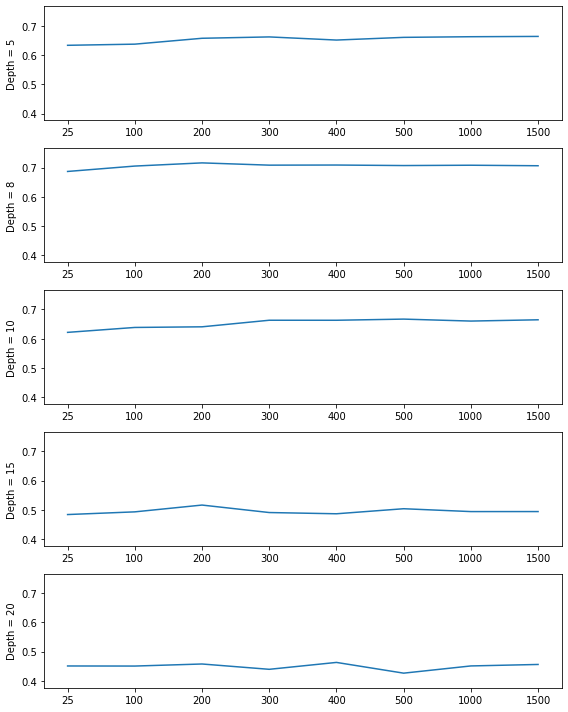

In [56]:
with open('./output_20Q3/clf_res_balanced.p','rb') as in_file:
    this_res = pickle.load(in_file)
plot_res(this_res)

## NOT Using class weight - balanced

When fitting without using Balance, you have to go depth 15 to have the same F_score

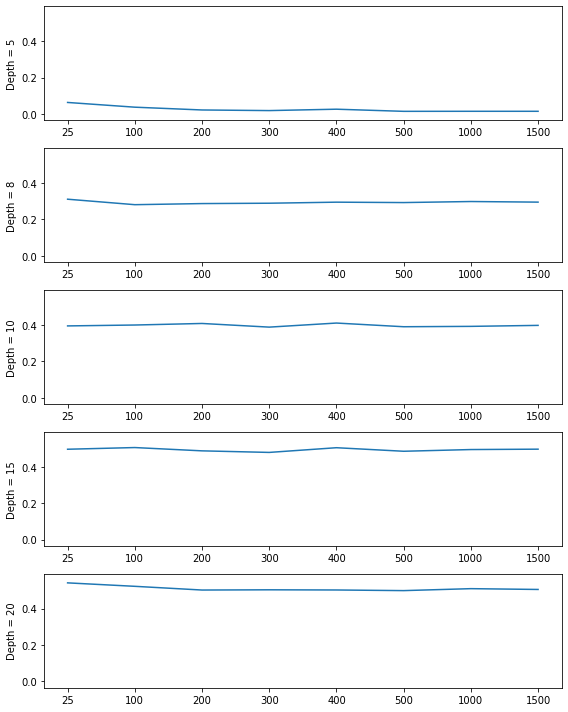

In [57]:
with open('./output_20Q3/clf_res_imbalanced.p','rb') as in_file:
    this_res = pickle.load(in_file)
plot_res(this_res)

In [8]:
# To do:
# Cross Validation + Grid search?
# OOB + Grid search + ?
# Out of bag seems to be be accuracy
# What happens if out of bag + sample weights = balanced
# https://datascience.stackexchange.com/questions/13151/randomforestclassifier-oob-scoring-method
# which will perform better on my testing data set?


# Grid search

In [58]:
parameters = {'max_depth':[5,10], 'n_estimators':[10, 20, 50], 'class_weight': [None,'balanced'],
             'max_samples':[0.5, 0.75, 1]} 
clf = GridSearchCV(MyRF(), parameters)
clf.fit(X, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=MyRF(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                            criterion='gini', max_depth=None,
                            max_features='auto', max_leaf_nodes=None,
                            max_samples=None, min_impurity_decrease=0.0,
                            min_impurity_split=None, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_jobs=None, oob_score=False,
                            random_state=None, verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [5, 10], 'max_samples': [0.5, 0.75, 1],
                         'n_estimators': [10, 20, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [60]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_max_depth,param_max_samples,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.076600,0.008358,0.002600,0.000801,None,5,0.5,10,"{'class_weight': None, 'max_depth': 5, 'max_sa...",0.91000,0.89250,0.88125,0.89000,0.89750,0.89425,0.009474,24
1,0.133212,0.007402,0.005190,0.001944,None,5,0.5,20,"{'class_weight': None, 'max_depth': 5, 'max_sa...",0.91750,0.90625,0.91500,0.91625,0.90750,0.91250,0.004677,17
2,0.343412,0.023625,0.010187,0.001449,None,5,0.5,50,"{'class_weight': None, 'max_depth': 5, 'max_sa...",0.93375,0.91250,0.93375,0.92875,0.92625,0.92700,0.007810,9
3,0.084004,0.003145,0.002197,0.000402,None,5,0.75,10,"{'class_weight': None, 'max_depth': 5, 'max_sa...",0.89375,0.88250,0.90375,0.91625,0.90375,0.90000,0.011292,23
4,0.179986,0.013010,0.004413,0.000495,None,5,0.75,20,"{'class_weight': None, 'max_depth': 5, 'max_sa...",0.91750,0.89875,0.91625,0.91250,0.90875,0.91075,0.006736,20
5,0.456105,0.036369,0.010194,0.002489,None,5,0.75,50,"{'class_weight': None, 'max_depth': 5, 'max_sa...",0.93625,0.91125,0.92125,0.91375,0.92000,0.92050,0.008718,12
6,0.030402,0.008310,0.002405,0.000481,None,5,1,10,"{'class_weight': None, 'max_depth': 5, 'max_sa...",0.12750,0.12750,0.12750,0.12750,0.12750,0.12750,0.000000,25
7,0.061780,0.025891,0.004815,0.001330,None,5,1,20,"{'class_weight': None, 'max_depth': 5, 'max_sa...",0.12750,0.12750,0.12750,0.12750,0.12750,0.12750,0.000000,25
8,0.179997,0.076099,0.010000,0.004145,None,5,1,50,"{'class_weight': None, 'max_depth': 5, 'max_sa...",0.12750,0.12750,0.12750,0.12750,0.12750,0.12750,0.000000,25
9,0.131408,0.027727,0.004391,0.001848,None,10,0.5,10,"{'class_weight': None, 'max_depth': 10, 'max_s...",0.91625,0.90125,0.90625,0.91500,0.91625,0.91100,0.006144,19
